In [ ]:
from google.colab import files
uploaded = files.upload()


Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv


In [ ]:
import pandas as pd

# Make sure the file name is correct (check spelling and spacing!)
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# Preview the data
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Check structure
df.info()

# Check for missing values
df.isnull().sum()

# Dataset shape
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


(7787, 12)

/tmp/ipython-input-1309002939.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


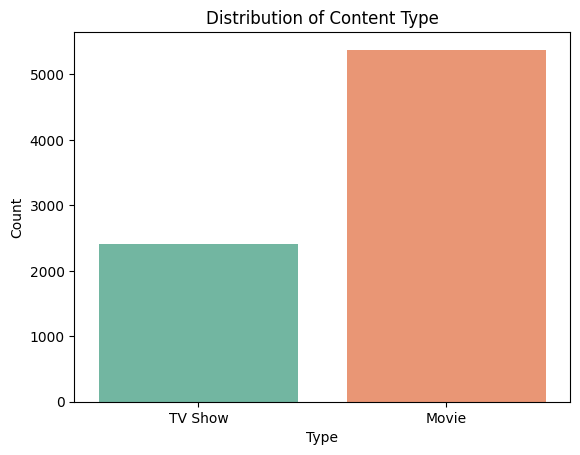

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='type', data=df, palette='Set2')
plt.title("Distribution of Content Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


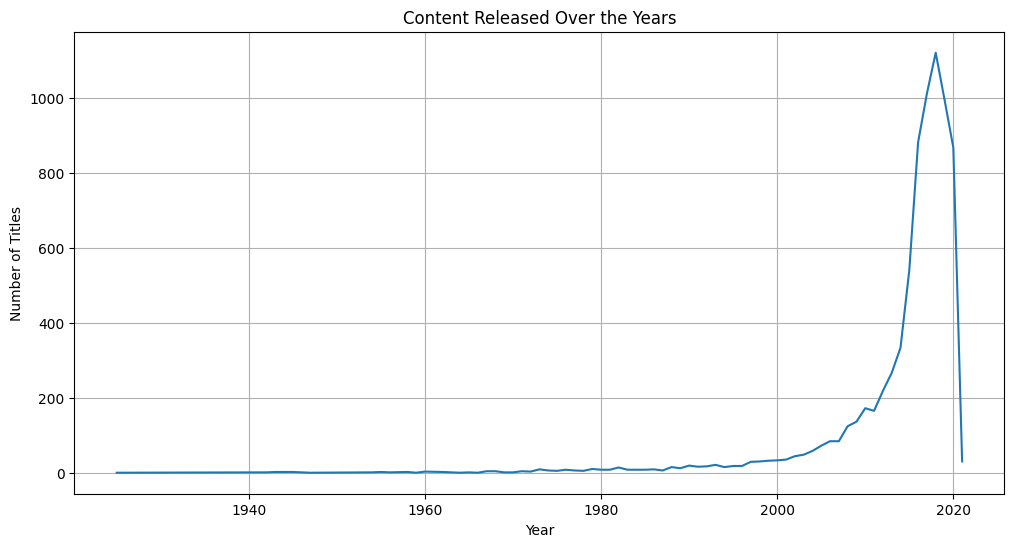

In [ ]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,6))
plt.title("Content Released Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


/tmp/ipython-input-2233517107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genre_counts), y=list(genre_names), palette='viridis')


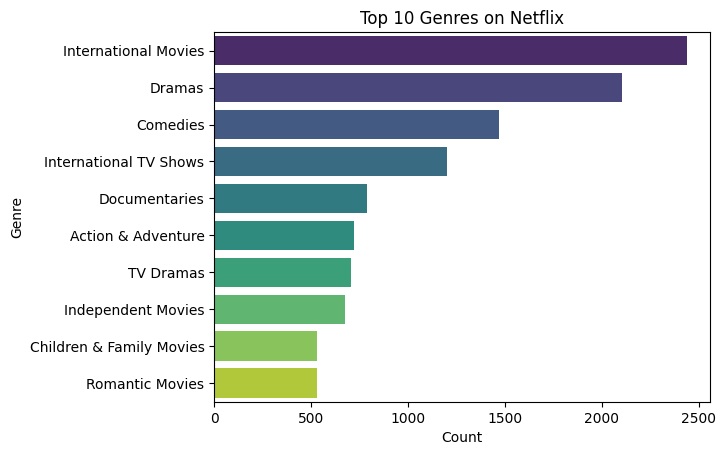

In [ ]:
from collections import Counter

# Split multiple genres
genre_list = df['listed_in'].str.split(', ')
all_genres = [genre for sublist in genre_list for genre in sublist]
top_genres = Counter(all_genres).most_common(10)

# Plot
genre_names, genre_counts = zip(*top_genres)
sns.barplot(x=list(genre_counts), y=list(genre_names), palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


/tmp/ipython-input-55064582.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(country_counts), y=list(country_names), palette='coolwarm')


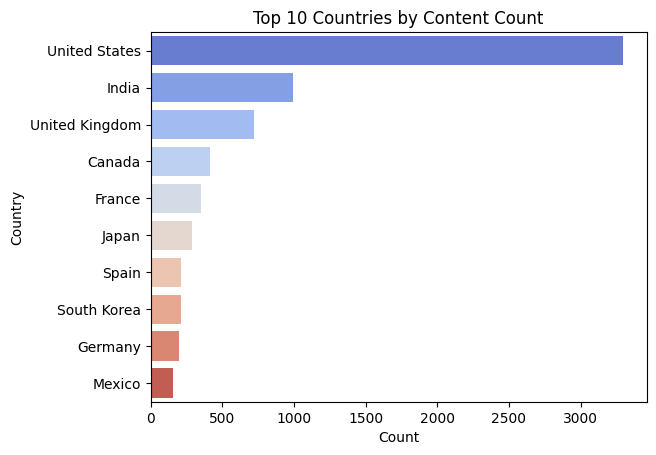

In [ ]:
country_list = df['country'].dropna().str.split(', ')
all_countries = [country for sublist in country_list for country in sublist]
top_countries = Counter(all_countries).most_common(10)

country_names, country_counts = zip(*top_countries)
sns.barplot(x=list(country_counts), y=list(country_names), palette='coolwarm')
plt.title("Top 10 Countries by Content Count")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


In [ ]:
# Replace missing with 'Unknown' for safety
df['country'] = df['country'].fillna('Unknown')

# Split and normalize country column
country_split = df['country'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
df_countries = df.drop('country', axis=1).join(country_split.rename('country'))
df_countries['country'] = df_countries['country'].str.strip()


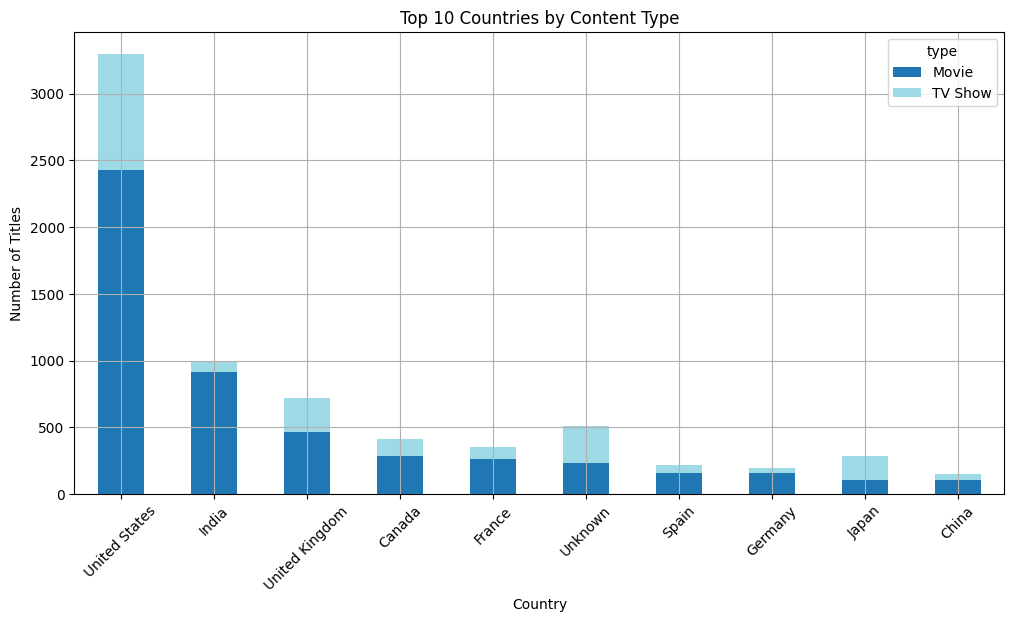

In [ ]:
country_type = df_countries.groupby(['country', 'type']).size().unstack().fillna(0)
top_10 = country_type.sort_values('Movie', ascending=False).head(10)

# Plot
top_10.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Top 10 Countries by Content Type")
plt.ylabel("Number of Titles")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year


In [ ]:
df[['date_added', 'year_added']].head()


,date_added,year_added
0,2020-08-14,2020.0
1,2016-12-23,2016.0
2,2018-12-20,2018.0
3,2017-11-16,2017.0
4,2020-01-01,2020.0


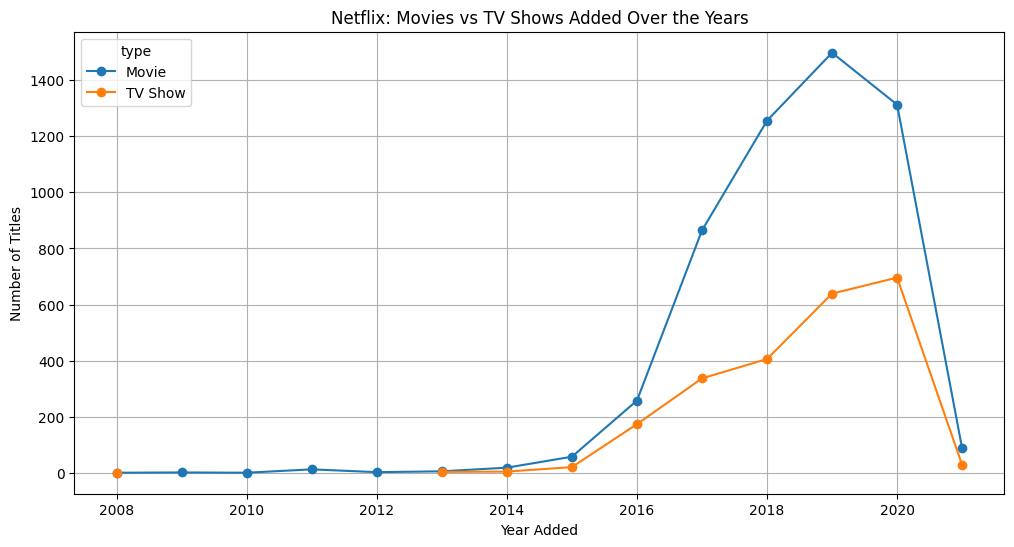

In [ ]:
# Group by year and type, count number of titles
content_trend = df.groupby(['year_added', 'type']).size().unstack()

# Plot
content_trend.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Netflix: Movies vs TV Shows Added Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


In [ ]:
# Handle TV Shows and Movies separately
df_movies = df[df['type'] == 'Movie'].copy()
df_shows = df[df['type'] == 'TV Show'].copy()

# Extract duration in minutes for movies
df_movies['duration_int'] = df_movies['duration'].str.extract('(\d+)').astype(float)

# Extract number of seasons for TV shows
df_shows['duration_int'] = df_shows['duration'].str.extract('(\d+)').astype(float)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# For simplicity, do clustering only for movies
X = df_movies[['release_year', 'duration_int']].dropna()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataframe
df_movies['cluster'] = kmeans.predict(X_scaled)


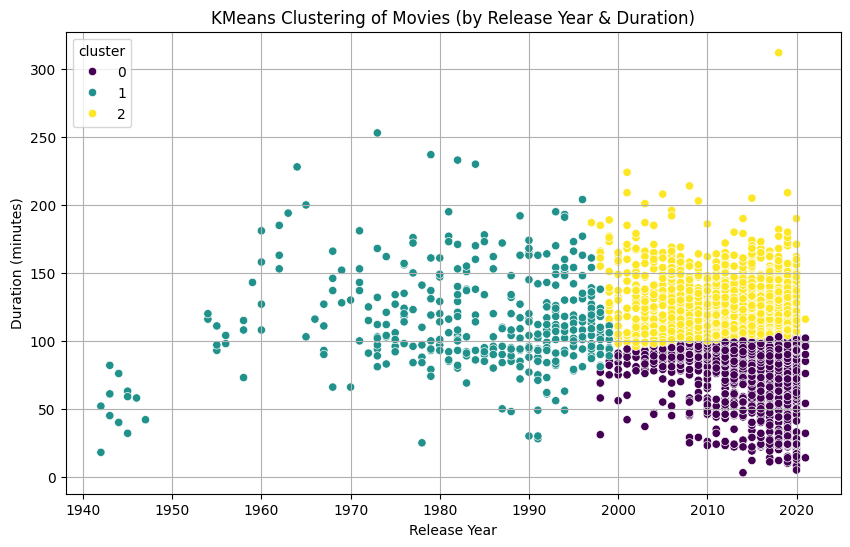

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_movies, x='release_year', y='duration_int', hue='cluster', palette='viridis')
plt.title('KMeans Clustering of Movies (by Release Year & Duration)')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()
